Om Kalikaya Namaha

In [141]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [142]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

In [143]:
#imporing dataset
potential = pd.read_csv('/content/drive/MyDrive/X EDUCATION LOGISTIC REGRESSION GROUP ASSIGNMENT/Leads.csv')

In [144]:
potential.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [145]:
potential.shape

(9240, 37)

In [146]:
pd.set_option('display.max_columns', None)
potential

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.00,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.50,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,Email Marked Spam,Saudi Arabia,IT Projects Management,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,High in Relevance,No,No,Potential Lead,Mumbai,02.Medium,01.High,15.0,17.0,No,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,SMS Sent,India,Media and Advertising,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,wrong number given,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,19.0,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,SMS Sent,India,Business Administration,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,invalid number,Not Sure,No,No,Potential Lead,Mumbai,02.Medium,01.High,13.0,20.0,No,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.00,SMS Sent,India,Human Resource Management,Online Search,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,Other Metro Cities,02.Medium,02.Medium,15.0,16.0,No,No,SMS Sent


In [147]:
potential.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [148]:
# prompt: find null values in the uploaded csv file

potential.isnull().sum().sort_values(ascending = False)


Lead Quality                                     4767
Asymmetrique Activity Index                      4218
Asymmetrique Profile Score                       4218
Asymmetrique Activity Score                      4218
Asymmetrique Profile Index                       4218
Tags                                             3353
Lead Profile                                     2709
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
Page Views Per Visit                              137
TotalVisits                                       137
Last Activity                                     103
Lead Source                                        36
Receive More Updates About Our Courses              0
I agree to pay the amount th

In [149]:
potential.shape

(9240, 37)

##EDA

In [150]:
#check for duplicates
sum(potential.duplicated(subset = 'Prospect ID')) == 0

True

In [151]:
sum(potential.duplicated(subset = 'Lead Number')) == 0

True

As we see there are quite a few categorical variables present in this dataset for which we will need to create dummy variables. Also, there are a lot of null values present as well, so we will need to treat them accordingly. No duplicate values exist in 'Prospect ID' and 'Lead Number'

In [152]:
#dropping Lead Number and Prospect ID since they have all unique values

potential.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)

In [153]:
# Let's now check the percentage of missing values in each column

round(100*(potential.isnull().sum()/len(potential.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [154]:
#dropping all the columns  with more than 50% missing values
cols = potential.columns

for i in potential:
    if((100*(potential[i].isnull().sum()/len(potential.index))) >= 50):
        potential.drop(i, 1, inplace = True)

In [155]:
potential.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

In [156]:
#checking null values percentage

round(100*(potential.isnull().sum()/len(potential.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [157]:
#checking value counts of Country column

potential['Country'].value_counts(dropna=False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

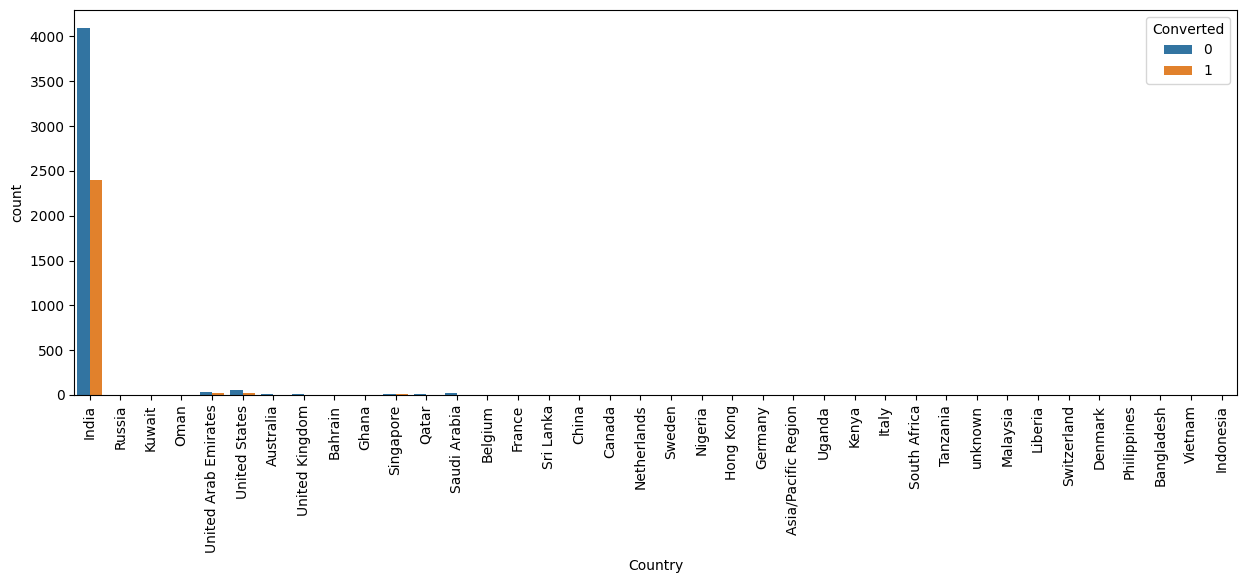

In [158]:
#plotting spread of Country columnn
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
s1 = sns.countplot(x='Country', hue='Converted', data=potential)
s1.set_xticklabels(s1.get_xticklabels(), rotation=90)
plt.show()



In [159]:
#The Number of Values for India are quite high so this  column can be dropped
potential.drop(['Country'], axis = 1, inplace = True)

In [160]:
potential.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Specialization',
       'How did you hear about X Education', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [161]:
#the same applies to city
potential.drop(['City'], axis = 1, inplace = True)

In [162]:
potential.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                                           0
Digital Advertisement       

In [163]:
#The following three columns now have the level 'Select'.
potential['Lead Profile'].astype('category').value_counts()

Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [164]:
potential['How did you hear about X Education'].value_counts()

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [165]:
potential['Specialization'].value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

Lead Profile and How did you hear about X Education have a lot of rows which have the value Select which is of no use to the analysis so it's best that we drop them.

In [166]:
potential.drop(['Lead Profile', 'How did you hear about X Education'], axis = 1, inplace = True)

In [167]:
potential.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Specialization                                   1438
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                                           0
Digital Advertisement                               0
Through Recommendations     

In [168]:
#What is your current occupation

potential['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [169]:
#imputing Nan values with mode "Unemployed"

potential['What is your current occupation'] = potential['What is your current occupation'].replace(np.nan, 'Unemployed')

In [170]:
potential['What is your current occupation'].value_counts(dropna=False)

Unemployed              8290
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

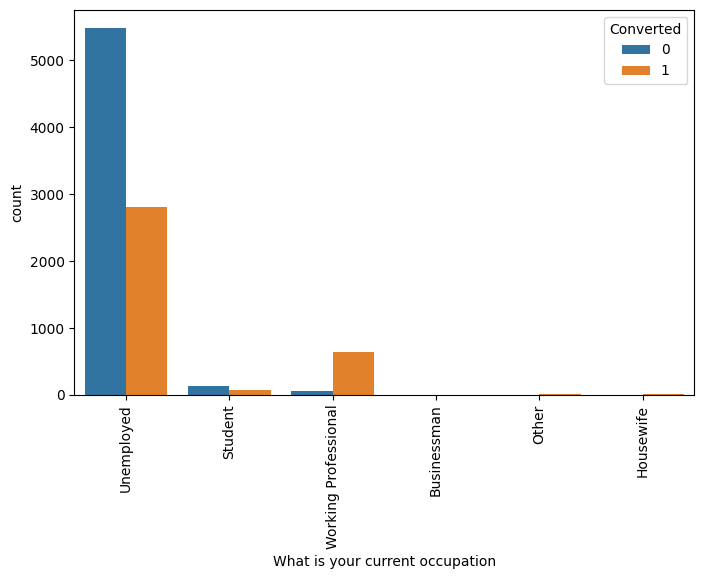

In [171]:
#visualizing count of Variable based on Converted value

plt.figure(figsize=(8, 5))
s1 = sns.countplot(x='What is your current occupation', hue='Converted', data=potential)
s1.set_xticklabels(s1.get_xticklabels(), rotation=90)
plt.show()

Working Professionals going for the course have high chances of joining it

In [172]:
#checking value counts

potential['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [173]:
#replacing Nan values with Mode 'Other Oppurtunities'

potential['What matters most to you in choosing a course'] = potential['What matters most to you in choosing a course'].replace(np.nan,'Other Oppurtunities')

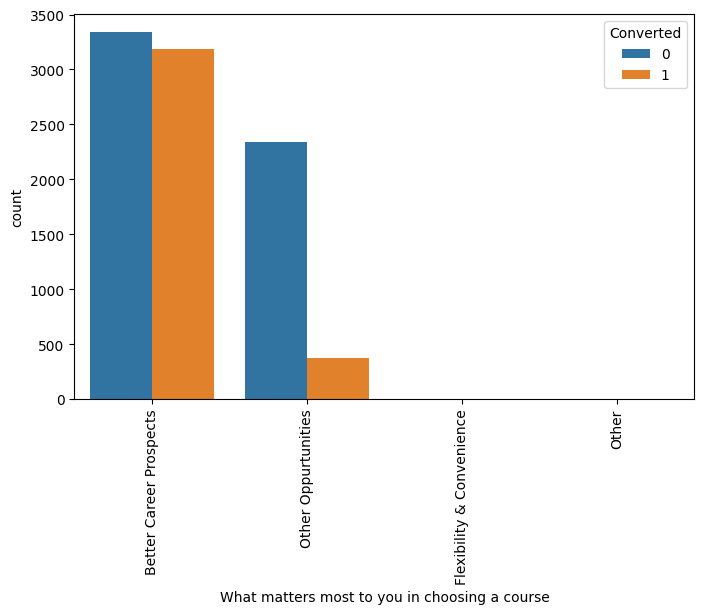

In [174]:
#visualizing count of Variable based on Converted value

plt.figure(figsize=(8, 5))
s1 = sns.countplot(x='What matters most to you in choosing a course', hue='Converted', data=potential)
s1.set_xticklabels(s1.get_xticklabels(), rotation=90)
plt.show()

In [175]:
potential.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Specialization                                   1438
What is your current occupation                     0
What matters most to you in choosing a course       0
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                                           0
Digital Advertisement                               0
Through Recommendations     

In [176]:
#checking value counts of Specialization column

potential['Specialization'].value_counts(dropna=False)

Select                               1942
NaN                                  1438
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [177]:
# Lead may not have mentioned specialization because they may be students
#or  don't have a specialization yet. So we will replace NaN values here with 'Not Specified'

potential['Specialization'] = potential['Specialization'].replace(np.nan, 'Not Specified')

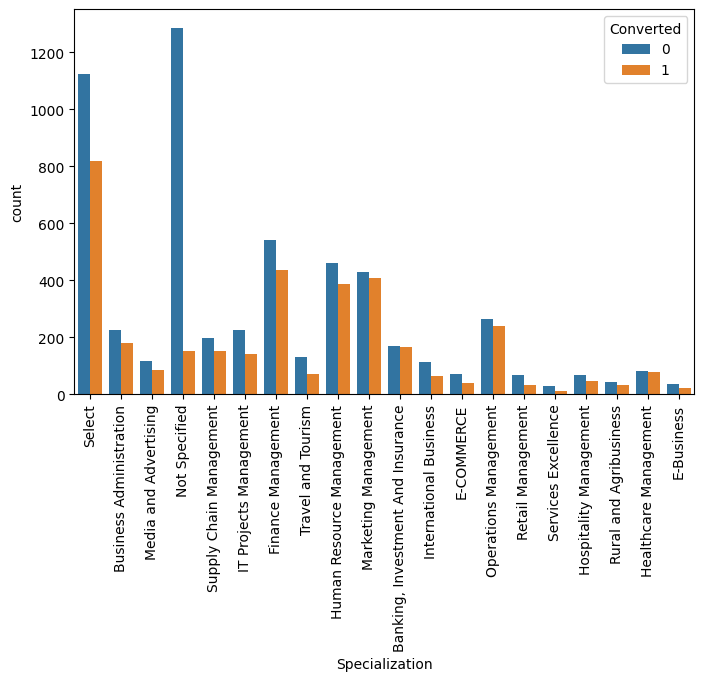

In [178]:
#plotting spread of Specialization columnn

plt.figure(figsize=(8, 5))
s1 = sns.countplot(x='Specialization', hue='Converted', data=potential)
s1.set_xticklabels(s1.get_xticklabels(), rotation=90)
plt.show()


We see that specialization with Management in them have higher number of leads as well as leads converted. So this is definitely a significant variable and should not be dropped.

In [179]:
#combining Management Specializations because they show similar trends

potential['Specialization'] = potential['Specialization'].replace(['Finance Management','Human Resource Management',
                                                           'Marketing Management','Operations Management',
                                                           'IT Projects Management','Supply Chain Management',
                                                    'Healthcare Management','Hospitality Management',
                                                           'Retail Management'] ,'Management_Specializations')

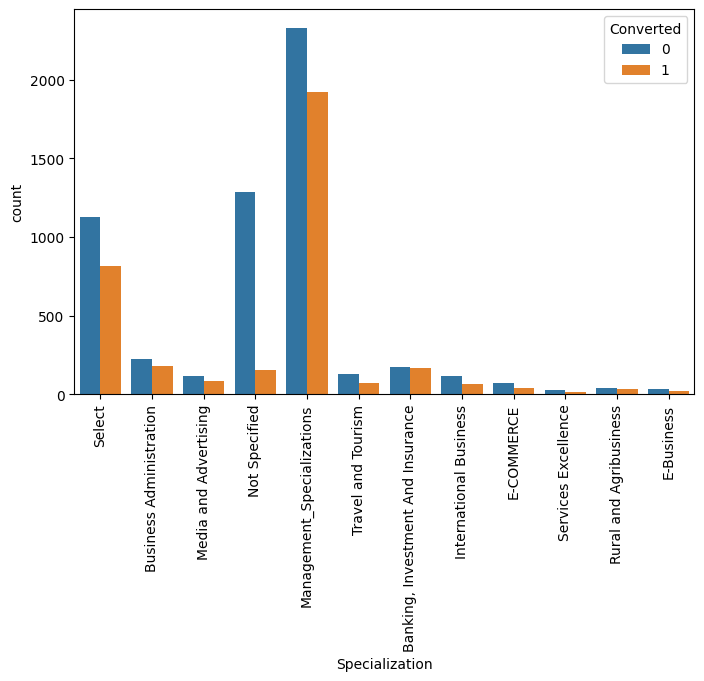

In [180]:
#visualizing count of Variable based on Converted value

plt.figure(figsize=(8, 5))
s1 = sns.countplot(x='Specialization', hue='Converted', data=potential)
s1.set_xticklabels(s1.get_xticklabels(), rotation=90)
plt.show()


In [181]:
potential.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Specialization                                      0
What is your current occupation                     0
What matters most to you in choosing a course       0
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                                           0
Digital Advertisement                               0
Through Recommendations     

In [182]:
#checking value counts of Tag variable
potential['Tags'].value_counts(dropna=False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [183]:
#replacing Nan values with "Not Specified"
potential['Tags'] = potential['Tags'].replace(np.nan,'Not Specified')

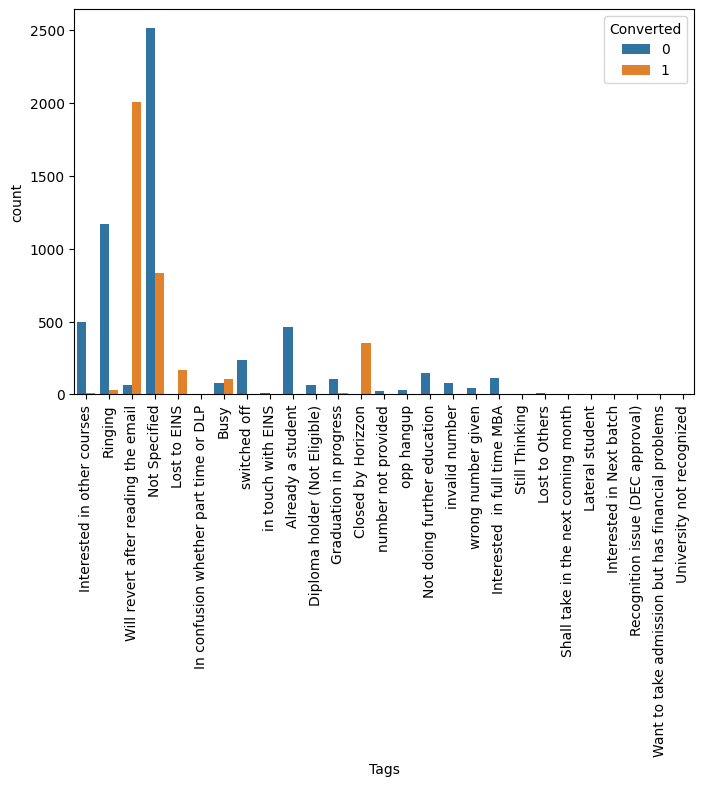

In [184]:
#visualizing count of Variable based on Converted value

plt.figure(figsize=(8, 5))
s1 = sns.countplot(x='Tags', hue='Converted', data=potential)
s1.set_xticklabels(s1.get_xticklabels(), rotation=90)
plt.show()

In [185]:
#replacing tags with low or negligable value with "Other Tags"
potential['Tags'] = potential['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                     'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized','switched off',
                                      'Already a student',
                                       'Not doing further education',
                                       'invalid number',
                                       'wrong number given',
                                       'Interested  in full time MBA'], 'Other_Tags')

In [186]:
potential.drop(['Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score','Asymmetrique Profile Score'], 1, inplace = True)

In [187]:
#checking percentage of missing values
round(100*(potential.isnull().sum()/len(potential.index)), 2)

Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement                            0.00
Through Recommendations     

In [188]:
#checking value counts of Lead Source column

potential['Lead Source'].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [189]:
#replacing Nan Values and combining low frequency values
potential['Lead Source'] = potential['Lead Source'].replace(np.nan,'Others')
potential['Lead Source'] = potential['Lead Source'].replace('google','Google')
potential['Lead Source'] = potential['Lead Source'].replace('Facebook','Social Media')
potential['Lead Source'] = potential['Lead Source'].replace(['bing','Click2call','Press_Release',
                                                     'youtubechannel','welearnblog_Home',
                                                     'WeLearn','blog','Pay per Click Ads',
                                                    'testone','NC_EDM'] ,'Others')

We can group some of the lower frequency occuring labels under a common label 'Others'

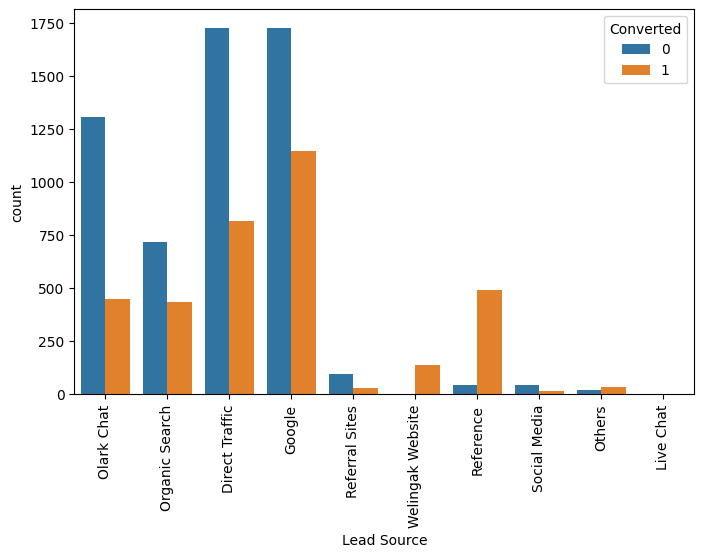

In [190]:
#visualizing count of Variable based on Converted value

plt.figure(figsize=(8, 5))
s1 = sns.countplot(x='Lead Source', hue='Converted', data=potential)
s1.set_xticklabels(s1.get_xticklabels(), rotation=90)
plt.show()

Inference

Maximum number of leads are generated by Google and Direct traffic.
Conversion Rate of reference leads and leads through welingak website is high.
To improve overall lead conversion rate, focus should be on improving lead converion of olark chat, organic search, direct traffic, and google leads and generate more leads from reference and welingak website.

In [191]:
#checking value counts of Last Activity column :

potential['Last Activity'].value_counts(dropna=False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [192]:
#replacing Nan Values and combining low frequency values

potential['Last Activity'] = potential['Last Activity'].replace(np.nan,'Others')
potential['Last Activity'] = potential['Last Activity'].replace(['Unreachable','Unsubscribed',
                                                        'Had a Phone Conversation',
                                                        'Approached upfront',
                                                        'View in browser link Clicked',
                                                        'Email Marked Spam',
                                                        'Email Received','Resubscribed to emails',
                                                         'Visited Booth in Tradeshow'],'Others')

In [193]:
#checking value counts of Last Activity column

potential['Last Activity'].value_counts(dropna=False)

Email Opened                 3437
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Others                        308
Email Link Clicked            267
Form Submitted on Website     116
Name: Last Activity, dtype: int64

In [194]:
#Check the Null Values in All Columns:
round(100*(potential.isnull().sum()/len(potential.index)), 2)

Lead Origin                                      0.00
Lead Source                                      0.00
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement                            0.00
Through Recommendations     

In [195]:
#Drop all rows which have Nan Values. Since the number of Dropped rows is less than 2%, it will not affect the model
potential = potential.dropna()

In [196]:
potential.isnull().sum()

Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Specialization                                   0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Magazine                                         0
Newspaper Article                                0
X Education Forums                               0
Newspaper                                        0
Digital Advertisement                            0
Through Recommendations                          0
Receive More Updates About Our 

Inference after Exploratory Data Analysis

API and Landing Page Submission bring higher number of leads as well as conversion.
Lead Add Form has a very high conversion rate but count of leads are not very high.
Lead Import and Quick Add Form get very few leads.
In order to improve overall lead conversion rate, we have to improve lead converion of API and Landing Page Submission origin and generate more leads from Lead Add Form.

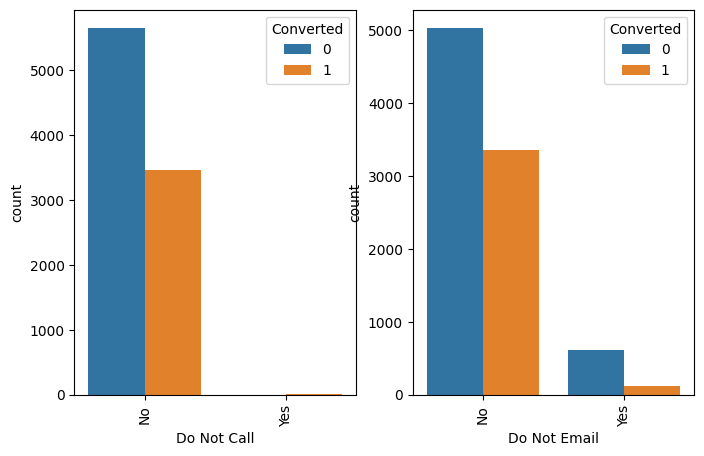

In [197]:
#Do Not Email & Do Not Call
#visualizing count of Variable based on Converted value
plt.figure(figsize=(8, 5))
ax1 = plt.subplot(1, 2, 1)
ax1 = sns.countplot(x='Do Not Call', hue='Converted', data=potential)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)

ax2 = plt.subplot(1, 2, 2)
ax2 = sns.countplot(x='Do Not Email', hue='Converted', data=potential)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)

plt.show()

In [198]:
potential['Do Not Call'].value_counts(dropna=False)

No     9101
Yes       2
Name: Do Not Call, dtype: int64

In [199]:
potential['Do Not Email'].value_counts(dropna=False)

No     8379
Yes     724
Name: Do Not Email, dtype: int64

In [200]:
#We Can append the Do Not Call Column to the list of Columns to be Dropped since > 90% is of only one Value
potential.drop(['Do Not Call'], axis = 1, inplace = True)

In [201]:
potential.Search.value_counts(dropna=False)

No     9089
Yes      14
Name: Search, dtype: int64

In [202]:
potential.Magazine.value_counts(dropna=False)

No    9103
Name: Magazine, dtype: int64

In [203]:
potential['Newspaper Article'].value_counts(dropna=False)

No     9101
Yes       2
Name: Newspaper Article, dtype: int64

In [204]:
potential['X Education Forums'].value_counts(dropna=False)

No     9102
Yes       1
Name: X Education Forums, dtype: int64

In [205]:
potential['Newspaper'].value_counts(dropna=False)

No     9102
Yes       1
Name: Newspaper, dtype: int64

In [206]:
potential.drop(['Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
                 'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                 'Update me on Supply Chain Content',
                 'Get updates on DM Content','I agree to pay the amount through cheque'], axis = 1, inplace = True)

In [207]:
#checking value counts of last Notable Activity
potential['Last Notable Activity'].value_counts()

Modified                        3270
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

In [208]:
#clubbing lower frequency values

potential['Last Notable Activity'] = potential['Last Notable Activity'].replace(['Had a Phone Conversation',
                                                                       'Email Marked Spam',
                                                                         'Unreachable',
                                                                         'Unsubscribed',
                                                                         'Email Bounced',
                                                                       'Resubscribed to emails',
                                                                       'View in browser link Clicked',
                                                                       'Approached upfront',
                                                                       'Form Submitted on Website',
                                                                       'Email Received'],'Other_Notable_activity')

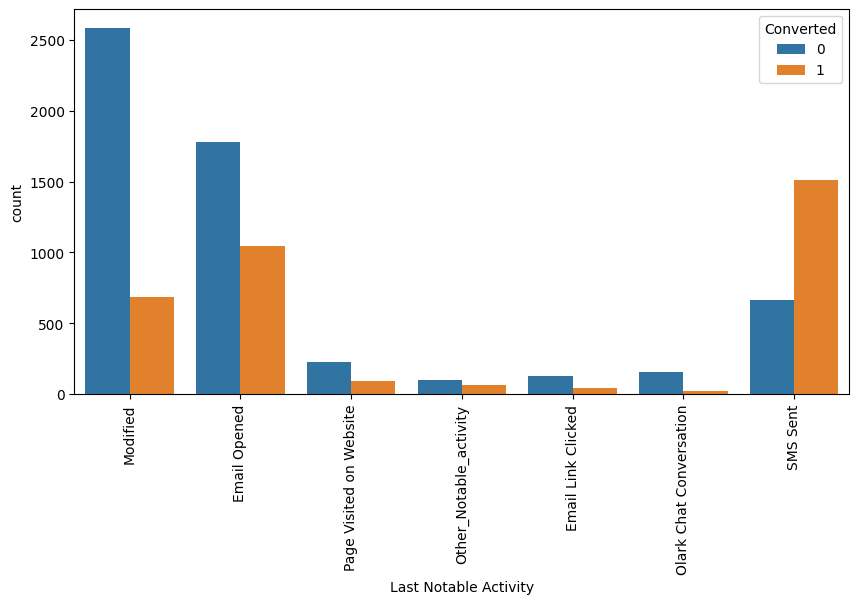

In [209]:
#visualizing count of Variable based on Converted value

plt.figure(figsize = (10,5))
ax1=sns.countplot(x = "Last Notable Activity", hue = "Converted", data = potential)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
plt.show()

In [210]:
#checking value counts for variable

potential['Last Notable Activity'].value_counts()

Modified                   3270
Email Opened               2827
SMS Sent                   2172
Page Visited on Website     318
Olark Chat Conversation     183
Email Link Clicked          173
Other_Notable_activity      160
Name: Last Notable Activity, dtype: int64

In [211]:
#Check the % of Data that has Converted Values = 1:

Converted = (sum(potential['Converted'])/len(potential['Converted'].index))*100
Converted

38.02043282434362

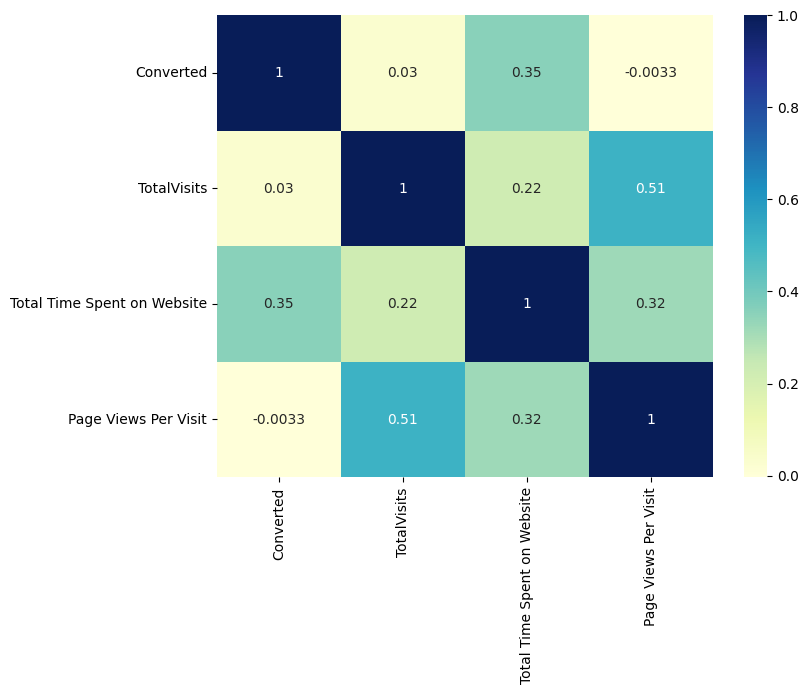

In [212]:
#Checking correlations of numeric values
# figure size
plt.figure(figsize=(8,6))

# heatmap
sns.heatmap(potential.corr(), cmap="YlGnBu", annot=True)
plt.show()

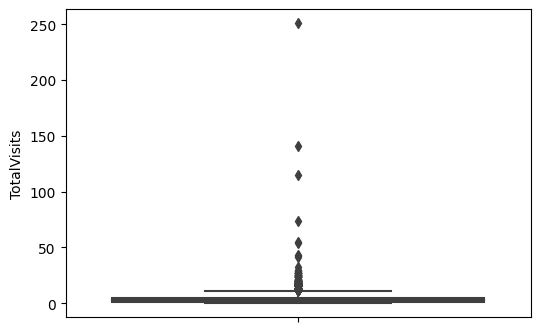

In [213]:
#Total Visits
#visualizing spread of variable

plt.figure(figsize=(6,4))
sns.boxplot(y=potential['TotalVisits'])
plt.show()

The Box plot reveals there are few outliers here

In [214]:
#checking percentile values for "Total Visits"

potential['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

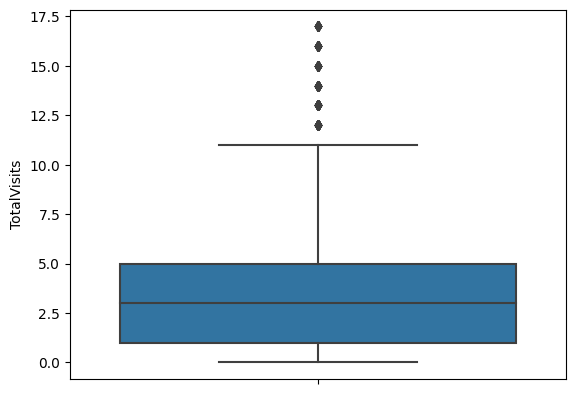

In [217]:
#Outlier Treatment: Remove top & bottom 1% of the Column Outlier values

Q3 = potential.TotalVisits.quantile(0.99)
potential = potential[(potential.TotalVisits <= Q3)]
Q1 = potential.TotalVisits.quantile(0.01)
potential = potential[(potential.TotalVisits >= Q1)]
sns.boxplot(y=potential['TotalVisits'])
plt.show()

In [218]:
potential.shape

(9020, 14)

In [219]:
#checking percentiles for "Total Time Spent on Website"

potential['Total Time Spent on Website'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9020.000000
mean      479.759534
std       544.688157
min         0.000000
5%          0.000000
25%         7.000000
50%       243.000000
75%       915.250000
90%      1371.000000
95%      1554.050000
99%      1836.620000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

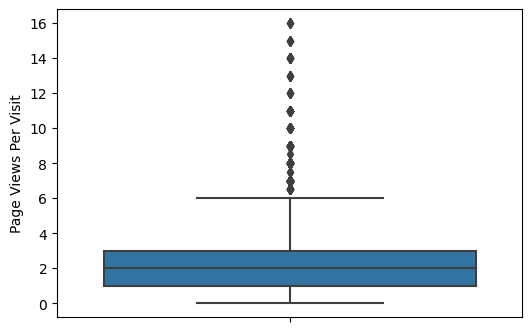

In [220]:
#visualizing spread of numeric variable

plt.figure(figsize=(6,4))
sns.boxplot(y=potential['Page Views Per Visit'])
plt.show()

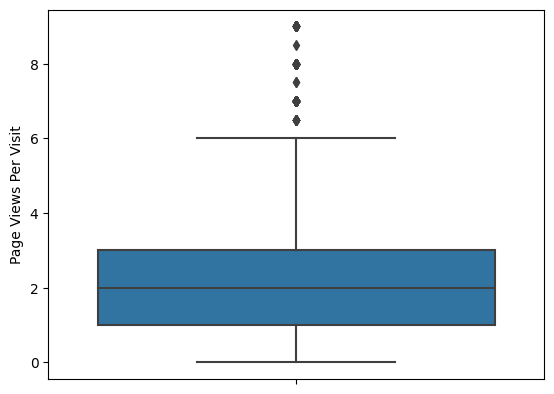

In [221]:
#Outlier Treatment: Remove top & bottom 1%

Q3 = potential['Page Views Per Visit'].quantile(0.99)
potential = potential[potential['Page Views Per Visit'] <= Q3]
Q1 = potential['Page Views Per Visit'].quantile(0.01)
potential = potential[potential['Page Views Per Visit'] >= Q1]
sns.boxplot(y=potential['Page Views Per Visit'])
plt.show()

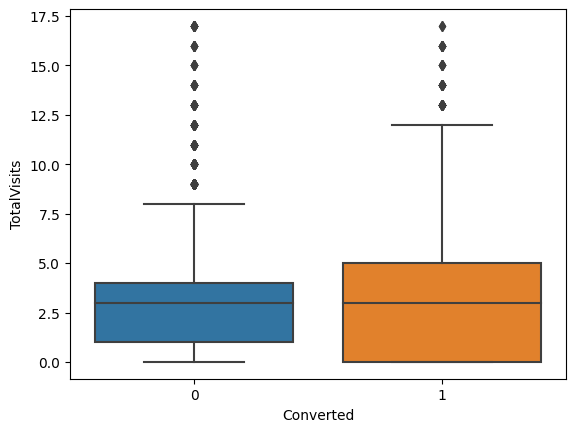

In [222]:
#checking Spread of "Total Visits" vs Converted variable
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = potential)
plt.show()

Inference

1) Median for converted and not converted leads are the close.
2) Nothng conclusive can be said on the basis of Total Visits

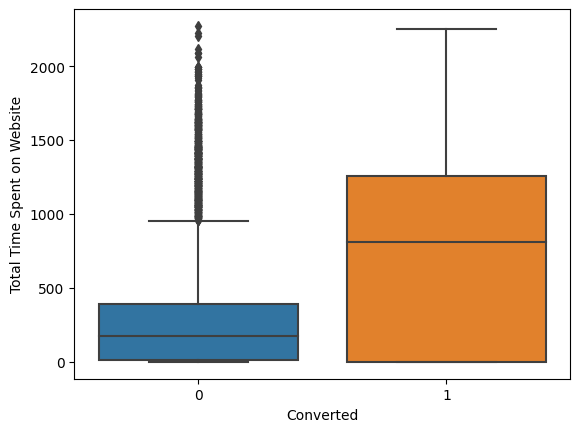

In [224]:
#checking Spread of "Total Time Spent on Website" vs Converted variable

sns.boxplot(x=potential.Converted, y=potential['Total Time Spent on Website'])
plt.show()

Inference

Leads spending more time on the website are more likely to be converted.
Website should be made more engaging to make leads spend more time.

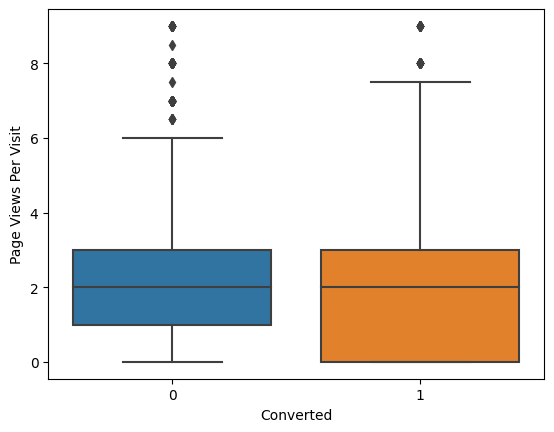

In [225]:
#checking Spread of "Page Views Per Visit" vs Converted variable

sns.boxplot(x=potential.Converted,y=potential['Page Views Per Visit'])
plt.show()

Inference

Median for converted and unconverted leads is the same.
Nothing can be said specifically for lead conversion from Page Views Per Visit

##Dummy Variable Creation

In [227]:
new_cols= potential.select_dtypes(include=['object']).columns
new_cols

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Tags',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [228]:
# List of variables to map

varlist =  ['A free copy of Mastering The Interview','Do Not Email']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
potential[varlist] = potential[varlist].apply(binary_map)

In [230]:
#getting dummies and dropping the first column and adding the results to the master dataframe
dummy = pd.get_dummies(potential[['Lead Origin','What is your current occupation']], drop_first=True)

potential = pd.concat([potential,dummy],1)

In [231]:
dummy = pd.get_dummies(potential['Specialization'], prefix  = 'Specialization')
dummy = dummy.drop(['Specialization_Not Specified'], 1)
potential = pd.concat([potential, dummy], axis = 1)

In [232]:
dummy = pd.get_dummies(potential['Lead Source'], prefix  = 'Lead Source')
dummy = dummy.drop(['Lead Source_Others'], 1)
potential = pd.concat([potential, dummy], axis = 1)

In [233]:
dummy = pd.get_dummies(potential['Last Activity'], prefix  = 'Last Activity')
dummy = dummy.drop(['Last Activity_Others'], 1)
potential = pd.concat([potential, dummy], axis = 1)

In [234]:
dummy = pd.get_dummies(potential['Last Notable Activity'], prefix  = 'Last Notable Activity')
dummy = dummy.drop(['Last Notable Activity_Other_Notable_activity'], 1)
potential = pd.concat([potential, dummy], axis = 1)

In [235]:
dummy = pd.get_dummies(potential['Tags'], prefix  = 'Tags')
dummy = dummy.drop(['Tags_Not Specified'], 1)
potential = pd.concat([potential, dummy], axis = 1)

In [236]:
#dropping the original columns after dummy variable creation

potential.drop(new_cols,1,inplace = True)

In [237]:
potential.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specializations,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Select,Specialization_Services Excellence,Specialization_Travel and Tourism,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
0,0,0.0,0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,1,2.0,1532,2.0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
3,0,1.0,305,1.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
4,1,2.0,1428,1.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


##Train-Test Split & Logistic Regression Model Building:

In [239]:
from sklearn.model_selection import train_test_split

# Putting response variable to y
y = potential['Converted']

y.head()

X=potential.drop('Converted', axis=1)

In [240]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [241]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6267 entries, 9196 to 5825
Data columns (total 52 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   TotalVisits                                           6267 non-null   float64
 1   Total Time Spent on Website                           6267 non-null   int64  
 2   Page Views Per Visit                                  6267 non-null   float64
 3   Lead Origin_Landing Page Submission                   6267 non-null   uint8  
 4   Lead Origin_Lead Add Form                             6267 non-null   uint8  
 5   Lead Origin_Lead Import                               6267 non-null   uint8  
 6   What is your current occupation_Housewife             6267 non-null   uint8  
 7   What is your current occupation_Other                 6267 non-null   uint8  
 8   What is your current occupation_Student               6

Model Building using Stats Model & RFE:

In [242]:
import statsmodels.api as sm

In [244]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

logreg = LogisticRegression()
rfe = RFE(estimator=logreg, n_features_to_select=15)  # Specify the number of features to select
rfe = rfe.fit(X_train, y_train)


In [245]:
rfe.support_

array([False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False,  True, False,  True, False, False, False,
        True, False,  True,  True, False,  True, False, False,  True,
       False,  True,  True,  True,  True,  True,  True])

In [246]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 31),
 ('Total Time Spent on Website', False, 37),
 ('Page Views Per Visit', False, 29),
 ('Lead Origin_Landing Page Submission', False, 8),
 ('Lead Origin_Lead Add Form', False, 13),
 ('Lead Origin_Lead Import', False, 38),
 ('What is your current occupation_Housewife', False, 32),
 ('What is your current occupation_Other', False, 34),
 ('What is your current occupation_Student', False, 28),
 ('What is your current occupation_Unemployed', False, 26),
 ('What is your current occupation_Working Professional', True, 1),
 ('Specialization_Banking, Investment And Insurance', False, 2),
 ('Specialization_Business Administration', False, 7),
 ('Specialization_E-Business', False, 4),
 ('Specialization_E-COMMERCE', False, 11),
 ('Specialization_International Business', False, 6),
 ('Specialization_Management_Specializations', False, 3),
 ('Specialization_Media and Advertising', False, 5),
 ('Specialization_Rural and Agribusiness', False, 12),
 ('Specialization_Select', T

In [247]:
#list of RFE supported columns
col = X_train.columns[rfe.support_]
col

Index(['What is your current occupation_Working Professional',
       'Specialization_Select', 'Lead Source_Welingak Website',
       'Last Activity_Email Bounced', 'Last Activity_Olark Chat Conversation',
       'Last Activity_SMS Sent', 'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Modified', 'Last Notable Activity_SMS Sent',
       'Tags_Closed by Horizzon', 'Tags_Interested in other courses',
       'Tags_Lost to EINS', 'Tags_Other_Tags', 'Tags_Ringing',
       'Tags_Will revert after reading the email'],
      dtype='object')

In [248]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_International Business',
       'Specialization_Management_Specializations',
       'Specialization_Media and Advertising',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence',
       'Specialization_Travel and Tourism', 'Lead Source_Direct Traffic',
       'Lead Source_Google', 'Lead Source_Live Chat', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Referenc

In [249]:
#BUILDING MODEL #1

X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6251
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1343.1
Date:                Tue, 19 Dec 2023   Deviance:                       2686.1
Time:                        16:24:32   Pearson chi2:                 1.12e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5935
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.5764      0.086    -18.300      0.000      -1.745      -1.408
What is your current occupation_Working Professional     1.0131      0.400      2.534      0.011       0.229       1.797
Specialization_Select                                    1.4878      0.132     11.279      0.000       1.229       1.746
Lead Source_Welingak Website                             4.0624      1.034      3.927      0.000       2.035       6.090
Last Activity_Email Bounced                             -1.2678      0.437     -2.899      0.004      -2.125      -0.411
Last Activity_Olark Chat Conversation                   -1.2131      0.239     -5.065      0.000      -1.682      -0.744
Last Activity_SMS Sent                                   1.0923      0.226      4.833      0.000       0.649       1.535
Last Notable Activity_Email Link Clicked                -1.4011      0.470     -2.980      0.003      -2.322      -0.480
Last Notable Activity_Modified                          -0.9370      0.159     -5.910      0.000      -1.248      -0.626
Last Notable Activity_SMS Sent                           1.1966      0.255      4.692      0.000       0.697       1.696
Tags_Closed by Horizzon                                  7.2073      1.012      7.119      0.000       5.223       9.191
Tags_Interested in other courses                        -2.5352      0.390     -6.500      0.000      -3.300      -1.771
Tags_Lost to EINS                                        5.7729      0.604      9.561      0.000       4.589       6.956
Tags_Other_Tags                                         -2.7062      0.204    -13.270      0.000      -3.106      -2.307
Tags_Ringing                                            -3.8024      0.240    -15.856      0.000      -4.272      -3.332
Tags_Will revert after reading the email                 4.5408      0.182     24.946      0.000       4.184       4.898
========================================================================================================================
"""

In [251]:
#BUILDING MODEL #2

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6251
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1343.1
Date:                Tue, 19 Dec 2023   Deviance:                       2686.1
Time:                        16:25:30   Pearson chi2:                 1.12e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5935
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.5764      0.086    -18.300      0.000      -1.745      -1.408
What is your current occupation_Working Professional     1.0131      0.400      2.534      0.011       0.229       1.797
Specialization_Select                                    1.4878      0.132     11.279      0.000       1.229       1.746
Lead Source_Welingak Website                             4.0624      1.034      3.927      0.000       2.035       6.090
Last Activity_Email Bounced                             -1.2678      0.437     -2.899      0.004      -2.125      -0.411
Last Activity_Olark Chat Conversation                   -1.2131      0.239     -5.065      0.000      -1.682      -0.744
Last Activity_SMS Sent                                   1.0923      0.226      4.833      0.000       0.649       1.535
Last Notable Activity_Email Link Clicked                -1.4011      0.470     -2.980      0.003      -2.322      -0.480
Last Notable Activity_Modified                          -0.9370      0.159     -5.910      0.000      -1.248      -0.626
Last Notable Activity_SMS Sent                           1.1966      0.255      4.692      0.000       0.697       1.696
Tags_Closed by Horizzon                                  7.2073      1.012      7.119      0.000       5.223       9.191
Tags_Interested in other courses                        -2.5352      0.390     -6.500      0.000      -3.300      -1.771
Tags_Lost to EINS                                        5.7729      0.604      9.561      0.000       4.589       6.956
Tags_Other_Tags                                         -2.7062      0.204    -13.270      0.000      -3.106      -2.307
Tags_Ringing                                            -3.8024      0.240    -15.856      0.000      -4.272      -3.332
Tags_Will revert after reading the email                 4.5408      0.182     24.946      0.000       4.184       4.898
========================================================================================================================
"""

In [252]:
#dropping column with high p-value

col = col.drop('Tags_Closed by Horizzon',1)

p-value of variable Last Notable Activity_Modified is high, so we can drop it.

In [253]:
#dropping column with high p-value

col = col.drop('Last Notable Activity_Modified',1)

In [254]:
#BUILDING MODEL #3

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6253
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1598.9
Date:                Tue, 19 Dec 2023   Deviance:                       3197.8
Time:                        16:27:00   Pearson chi2:                 9.77e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5589
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.3529      0.067    -20.088      0.000      -1.485      -1.221
What is your current occupation_Working Professional     2.7093      0.280      9.689      0.000       2.161       3.257
Specialization_Select                                    1.4683      0.122     12.081      0.000       1.230       1.706
Lead Source_Welingak Website                             4.1612      1.021      4.074      0.000       2.159       6.163
Last Activity_Email Bounced                             -1.7723      0.374     -4.733      0.000      -2.506      -1.038
Last Activity_Olark Chat Conversation                   -1.8040      0.206     -8.772      0.000      -2.207      -1.401
Last Activity_SMS Sent                                   0.1838      0.168      1.097      0.273      -0.145       0.512
Last Notable Activity_Email Link Clicked                -0.3539      0.323     -1.095      0.273      -0.987       0.279
Last Notable Activity_SMS Sent                           1.9729      0.188     10.512      0.000       1.605       2.341
Tags_Interested in other courses                        -3.2748      0.378     -8.654      0.000      -4.016      -2.533
Tags_Lost to EINS                                        4.9721      0.599      8.300      0.000       3.798       6.146
Tags_Other_Tags                                         -3.0797      0.200    -15.365      0.000      -3.473      -2.687
Tags_Ringing                                            -3.9957      0.239    -16.738      0.000      -4.464      -3.528
Tags_Will revert after reading the email                 4.0188      0.171     23.490      0.000       3.683       4.354
========================================================================================================================
"""

p-value of variable Last Activity_Page Visited on Website is high so we can drop it

In [258]:
#BUILDING MODEL #4

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6253
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1598.9
Date:                Tue, 19 Dec 2023   Deviance:                       3197.8
Time:                        16:29:02   Pearson chi2:                 9.77e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5589
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.3529      0.067    -20.088      0.000      -1.485      -1.221
What is your current occupation_Working Professional     2.7093      0.280      9.689      0.000       2.161       3.257
Specialization_Select                                    1.4683      0.122     12.081      0.000       1.230       1.706
Lead Source_Welingak Website                             4.1612      1.021      4.074      0.000       2.159       6.163
Last Activity_Email Bounced                             -1.7723      0.374     -4.733      0.000      -2.506      -1.038
Last Activity_Olark Chat Conversation                   -1.8040      0.206     -8.772      0.000      -2.207      -1.401
Last Activity_SMS Sent                                   0.1838      0.168      1.097      0.273      -0.145       0.512
Last Notable Activity_Email Link Clicked                -0.3539      0.323     -1.095      0.273      -0.987       0.279
Last Notable Activity_SMS Sent                           1.9729      0.188     10.512      0.000       1.605       2.341
Tags_Interested in other courses                        -3.2748      0.378     -8.654      0.000      -4.016      -2.533
Tags_Lost to EINS                                        4.9721      0.599      8.300      0.000       3.798       6.146
Tags_Other_Tags                                         -3.0797      0.200    -15.365      0.000      -3.473      -2.687
Tags_Ringing                                            -3.9957      0.239    -16.738      0.000      -4.464      -3.528
Tags_Will revert after reading the email                 4.0188      0.171     23.490      0.000       3.683       4.354
========================================================================================================================
"""

In [260]:
#p-value of variable Last Activity_SMS Sent is high so we can drop it
#dropping column with high p-value
col = col.drop('Last Activity_SMS Sent',1)

In [261]:
#BUILDING MODEL #5

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6254
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1599.5
Date:                Tue, 19 Dec 2023   Deviance:                       3198.9
Time:                        16:30:52   Pearson chi2:                 9.57e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5588
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.3281      0.063    -21.054      0.000      -1.452      -1.204
What is your current occupation_Working Professional     2.7025      0.280      9.666      0.000       2.155       3.251
Specialization_Select                                    1.4602      0.121     12.049      0.000       1.223       1.698
Lead Source_Welingak Website                             4.1686      1.021      4.083      0.000       2.168       6.170
Last Activity_Email Bounced                             -1.7934      0.374     -4.799      0.000      -2.526      -1.061
Last Activity_Olark Chat Conversation                   -1.8255      0.205     -8.925      0.000      -2.226      -1.425
Last Notable Activity_Email Link Clicked                -0.3759      0.322     -1.166      0.243      -1.008       0.256
Last Notable Activity_SMS Sent                           2.1342      0.118     18.148      0.000       1.904       2.365
Tags_Interested in other courses                        -3.2811      0.378     -8.674      0.000      -4.023      -2.540
Tags_Lost to EINS                                        4.9747      0.599      8.306      0.000       3.801       6.148
Tags_Other_Tags                                         -3.0822      0.200    -15.388      0.000      -3.475      -2.690
Tags_Ringing                                            -3.9952      0.239    -16.748      0.000      -4.463      -3.528
Tags_Will revert after reading the email                 4.0101      0.171     23.477      0.000       3.675       4.345
========================================================================================================================
"""

Since 'All' the p-values are less we can check the Variance Inflation Factor to see if there is any correlation between the variables

In [262]:
# Check for the VIF values of the feature variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [263]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Source_Welingak Website,1.08
3,Last Activity_Email Bounced,1.03
5,Last Notable Activity_Email Link Clicked,1.01
8,Tags_Lost to EINS,1.01
0,What is your current occupation_Working Profes...,0.53
4,Last Activity_Olark Chat Conversation,0.28
7,Tags_Interested in other courses,0.28
6,Last Notable Activity_SMS Sent,0.22
9,Tags_Other_Tags,0.22
11,Tags_Will revert after reading the email,0.14


So the Values all seem to be in order so now, Moving on to derive the Probabilities, Lead Score, Predictions on Train Data:

In [265]:
# Getting the Predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

9196    0.039578
4696    0.039578
3274    0.691285
2164    0.006865
1667    0.935959
7024    0.532986
8018    0.040950
778     0.209477
6942    0.008363
4440    0.209477
dtype: float64

In [266]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.03957781, 0.03957781, 0.69128492, 0.00686451, 0.9359585 ,
       0.53298561, 0.04095043, 0.20947681, 0.00836287, 0.20947681])

In [267]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,1,0.039578,9196
1,0,0.039578,4696
2,0,0.691285,3274
3,0,0.006865,2164
4,1,0.935959,1667


In [268]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,1,0.039578,9196,0
1,0,0.039578,4696,0
2,0,0.691285,3274,1
3,0,0.006865,2164,0
4,1,0.935959,1667,1


In [269]:
from sklearn import metrics

# Confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3660  222]
 [ 356 2029]]


In [270]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.9077708632519547


In [271]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [272]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8507337526205451

In [273]:
# Let us calculate specificity
TN / float(TN+FP)

0.9428129829984544

In [274]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.0571870170015456


In [275]:
# positive predictive value
print (TP / float(TP+FP))

0.9013771657041315


In [276]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9113545816733067


Plotting ROC Curve

In [277]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [278]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

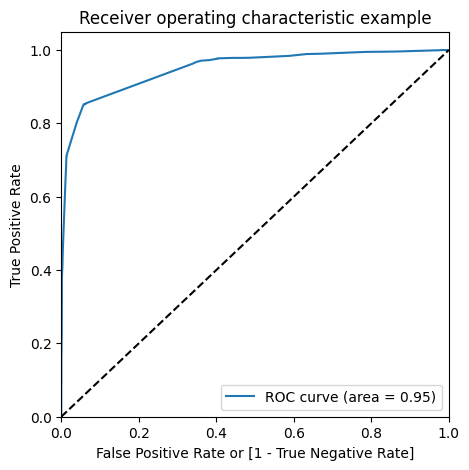

In [279]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

The ROC Curve should be a value close to 1. We are getting a good value of 0.95 indicating a good predictive model.
Finding Optimal Cutoff Point
Above we had chosen an arbitrary cut-off value of 0.5. We need to determine the best cut-off value and the below section deals with that:

In [280]:
# Let's create columns with different probability cutoffs
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.039578,9196,0,1,0,0,0,0,0,0,0,0,0
1,0,0.039578,4696,0,1,0,0,0,0,0,0,0,0,0
2,0,0.691285,3274,1,1,1,1,1,1,1,1,0,0,0
3,0,0.006865,2164,0,1,0,0,0,0,0,0,0,0,0
4,1,0.935959,1667,1,1,1,1,1,1,1,1,1,1,1


In [281]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1

    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.380565  1.000000  0.000000
0.1   0.1  0.753471  0.972327  0.619011
0.2   0.2  0.775491  0.963103  0.660227
0.3   0.3  0.904739  0.854088  0.935858
0.4   0.4  0.906654  0.851572  0.940495
0.5   0.5  0.907771  0.850734  0.942813
0.6   0.6  0.900112  0.802516  0.960072
0.7   0.7  0.882719  0.715304  0.985574
0.8   0.8  0.874262  0.690147  0.987378
0.9   0.9  0.873305  0.687631  0.987378


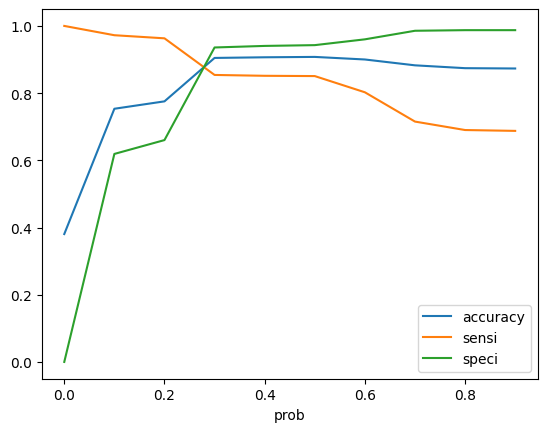

In [282]:
#plotting accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

In [292]:
y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Lead_Score,final_Predicted
0,1,0.039578,9196,0,1,0,0,0,0,0,0,0,0,0,4,0
1,0,0.039578,4696,0,1,0,0,0,0,0,0,0,0,0,4,0
2,0,0.691285,3274,1,1,1,1,1,1,1,1,0,0,0,69,1
3,0,0.006865,2164,0,1,0,0,0,0,0,0,0,0,0,1,0
4,1,0.935959,1667,1,1,1,1,1,1,1,1,1,1,1,94,1


In [284]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final[['Converted','Converted_prob','Prospect ID','Lead_Score']].head()

,Converted,Converted_prob,Prospect ID,Lead_Score
0,1,0.039578,9196,4
1,0,0.039578,4696,4
2,0,0.691285,3274,69
3,0,0.006865,2164,1
4,1,0.935959,1667,94


In [293]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)
confusion2

array([[3633,  249],
       [ 348, 2037]])

In [294]:
TP = confusion2[1,1] # true positive
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [295]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8540880503144654

In [296]:
# Let us calculate specificity
TN / float(TN+FP)

0.9358578052550232

Observation:

So as we can see above the model seems to be performing well. The ROC curve has a value of 0.95, which is very good. We have the following values for the Train Data:

Accuracy : 90.81%

Sensitivity : 85.4%

Specificity : 93.50%

Some of the other Stats are derived below, indicating the False Positive Rate, Positive Predictive Value,Negative Predictive Values, Precision & Recall.

In [297]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.06414219474497682


In [298]:
# Positive predictive value
print (TP / float(TP+FP))

0.8910761154855643


In [299]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9125847776940467


In [300]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion

array([[3633,  249],
       [ 348, 2037]])

In [301]:
# Precision
TP / TP + FP

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.8910761154855643

In [302]:
# Recall
TP / TP + FN

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8540880503144654

In [303]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_pred_final.Converted , y_train_pred_final.final_Predicted)

0.8910761154855643

In [304]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.8540880503144654

In [305]:
from sklearn.metrics import precision_recall_curve
y_train_pred_final.Converted, y_train_pred_final.final_Predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

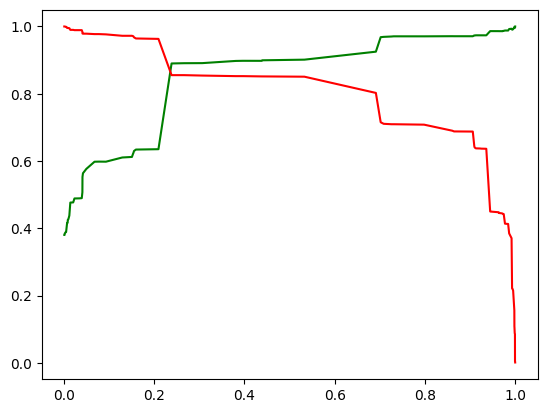

In [306]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [308]:
#scaling numeric columns

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

num_cols=X_train.select_dtypes(include=['float64', 'int64']).columns

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specializations,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Select,Specialization_Services Excellence,Specialization_Travel and Tourism,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
9196,0.668862,1.848117,1.455819,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0
4696,-0.030697,-0.037832,0.399961,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0
3274,0.319082,-0.642138,-0.127967,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
2164,-0.380477,-0.154676,-0.127967,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
1667,0.319082,1.258415,-0.481679,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1


In [309]:
#scaling test set

num_cols=X_test.select_dtypes(include=['float64', 'int64']).columns

X_test[num_cols] = scaler.fit_transform(X_test[num_cols])

X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specializations,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Select,Specialization_Services Excellence,Specialization_Travel and Tourism,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
7681,0.575687,-0.311318,0.092860,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0
984,-0.090676,-0.550262,0.356568,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0
8135,-0.423857,0.812462,-0.170849,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
6915,0.242505,-0.628665,-0.170849,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2712,-0.090676,-0.421456,0.356568,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1


In [310]:
X_test = X_test[col]
X_test.head()

,What is your current occupation_Working Professional,Specialization_Select,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Olark Chat Conversation,Last Notable Activity_Email Link Clicked,Last Notable Activity_SMS Sent,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
7681,0,0,0,0,0,0,1,0,0,0,1,0
984,0,0,0,0,0,0,0,0,0,1,0,0
8135,0,0,0,0,0,0,1,0,0,0,0,0
6915,0,0,0,0,0,0,0,0,0,0,1,0
2712,0,1,0,0,0,0,0,0,0,0,0,1


In [311]:
X_test_sm = sm.add_constant(X_test)

Prediction Test

In [312]:
y_test_pred = res.predict(X_test_sm)

In [313]:
y_test_pred[:10]

7681    0.039578
984     0.012006
8135    0.691285
6915    0.004853
2712    0.984361
244     0.020571
4698    0.012006
8287    0.040950
6791    0.984361
8970    0.041131
dtype: float64

In [314]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [315]:
# Let's see the head
y_pred_1.head()

,0
7681,0.039578
984,0.012006
8135,0.691285
6915,0.004853
2712,0.984361


,Converted,Prospect ID,0
0,0,7681,0.039578
1,0,984,0.012006
2,0,8135,0.691285
3,0,6915,0.004853
4,1,2712,0.984361


In [317]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [318]:
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [319]:
# Removing index for both dataframes to append them side by side
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Appending y_test_df and y_pred_1


In [320]:

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [321]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,7681,0.039578
1,0,984,0.012006
2,0,8135,0.691285
3,0,6915,0.004853
4,1,2712,0.984361


In [322]:
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [323]:
y_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,0,7681,0.039578
1,0,984,0.012006
2,0,8135,0.691285
3,0,6915,0.004853
4,1,2712,0.984361


In [324]:
# Rearranging the columns
y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_prob']]
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

In [325]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score
0,7681,0,0.039578,4
1,984,0,0.012006,1
2,8135,0,0.691285,69
3,6915,0,0.004853,0
4,2712,1,0.984361,98


In [326]:
y_pred_final['final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.3 else 0)

In [327]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score,final_Predicted
0,7681,0,0.039578,4,0
1,984,0,0.012006,1,0
2,8135,0,0.691285,69,1
3,6915,0,0.004853,0,0
4,2712,1,0.984361,98,1


In [328]:
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.9117647058823529

In [329]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion2

array([[1582,   94],
       [ 143,  867]])

In [330]:
TP = confusion2[1,1] # true positive
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [331]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8584158415841584

In [332]:
# Let us calculate specificity
TN / float(TN+FP)

0.9439140811455847

In [333]:
precision_score(y_pred_final.Converted , y_pred_final.final_Predicted)

0.9021852237252862

In [334]:
recall_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.8584158415841584

Observation:

After running the model on the Test Data these are the figures we obtain:

Accuracy : 91.92%

Sensitivity : 85.4%%

Specificity : 93.52%

Final Observation:

Let us compare the values obtained for Train & Test:

Train Data:

Accuracy : 90.81%

Sensitivity : 83.2%

Specificity : 92.10%

Test Data:

Accuracy : 91.00%

Sensitivity : 85.0%

Specificity : 90.61%

The Model seems to predict the Conversion Rate very well and we should be able to give the CEO confidence in making good calls based on this model